<a href="https://colab.research.google.com/github/leeh8911/note_for_study/blob/master/question_of_intuition_of_linear_algebra_statistics_and_geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수학하는 의사와의 대담
## Motivation
수학하는 의사님의 블로그[선형대수, 통계학, 기하적 직관, Dr. J’s Medical Blog](https://jryoungw.github.io/2019/09/08/linalg_stat_geom.html)를 읽다가 아래의 수식에 대한 궁금증으로 시작하게 되었습니다.

$$ 
Cov(Y - E[Y{\mid}X], f(X)) = 0
$$

블로그에서 설명하는 이 수식에 대한 의미는 선형대수 및 기하적 직관으로 통계학의 수식$E[Y{\mid}X]$는 $Y$라는 랜덤변수 공간을 $X$라는 랜덤변수 공간에 정사영을 시킨 것이고, 따라서 $Y - E[Y{\mid}X]$는 $Y$라는 랜덤변수 공간에서 $X$라는 랜덤변수 공간의 영향을 모두 제거한 것이고 다시 말하면 $X$에 대해 수직한 성분의 $Y$만 남긴 것이다.
여기서 생기는 궁금증은 통계적인 수식의 의미는 랜덤변수 $Y$에서 랜덤변수$X$와 관련된 것들을 제거한 것들과 임의의 함수를 통과한 $X$와의 연관성이 없다라고 이해는 되지만, 

1. 정말 모든 함수 $f(X)$에 대해 가능한지
2. 기대값은 어떤 공간에 대한 의미보단, 특정 값이라는 의미를 갖는데, 정말 위 수식이 0이 되는지

에 대한 의문이 들었습니다. 따라서 이를 해결하기 위해 직관이 아닌 실제로 유도하였을 때, 어떻게 되는지를 확인하고자 수학적인 유도를 해보았습니다.

## 수학적인 유도

공분산의 정의에 의해 위의 공분산 수식은 다음과 같이 풀어 쓸 수 있습니다.

$$
\begin{align}
Cov(Y - E[Y{\mid}X], f(X)) & = E[(Y-E[Y{\mid}X] - E[Y-E[Y{\mid}X]])*(f(X) - E[f(X)])] & (1)\\
&= E[(Y-E[Y]-E[Y{\mid}X]+E[E[Y{\mid}X]])*(f(X)-E[f(X)])] & (2)\\
&= E[(Y-E[Y]-E[Y{\mid}X]+E[Y])*(f(X)-E[f(X)])] & (3)\\
&= E[(Y-E[Y{\mid}X])*(f(X)-E[f(X)])] & (4)\\
&= E[Yf(X) - YE[f(X)] - E[Y{\mid}X]f(X)+E[Y{\mid}X]E[f(X)]] & (5) \\
&= E[Yf(X)] - E[YE[f(X)]] - E[E[Y{\mid}X]f(X)]+E[E[Y{\mid}X]E[f(X)]] & (6) \\
\end{align}
$$

식(1)은 공분산 함수를 정의에 따라 기대값 함수로 바꾸어주었다. 식(2)는 내부에 있는 기대값의 선형성을 이용하여 $E[Y - E[Y{\mid}X]] = E[Y] - E[Y{\mid}X]$로 나누어 계산하였다. 식(3)은 [law of total expectation](https://en.wikipedia.org/wiki/Law_of_total_expectation)에 따라 $E[E[Y{\mid}X]] = E[Y]$로 계산하였고, 식(4)는 식(3)을 마저 정리한 식이다. 식(5)~식(6)은 기대값 내부의 식을 마저 정리한 식이다.

위의 식(6)을 마저 정리하기 위해서는 $E[Yf(X)] - E[YE[f(X)]] = 0$과 $-E[E[Y{\mid}X]f(X)]+E[E[Y{\mid}X]E[f(X)]]=0$임을 마저 정리하면 원하는 결과에 도달 할 것이다. 이 식을 단순화 하여 아래처럼 정리 할 수 있다.
$$
\begin{align}
E[XE[Y]] &= E[X{\Sigma}_y[yP(Y=y)]] = {\Sigma}_x(x{\Sigma}_y(yP(Y=y,X=x))) \\
&={\Sigma}_x{\Sigma}_y(xyP(X=x,Y=y))\\
&=E[XY]
\end{align}
$$

즉, $E[YE[f(X)]] = E[Yf(X)]$로 쓸 수 있고, $E[E[Y{\mid}X]E[f(X)]] = E[E[Y{\mid}X]f(X)]$로 쓸 수 있다. 따라서 최종적으로 $ Cov(Y - E[Y{\mid}X], f(X)) = 0$이다.


## 수치적 확인

(추후 수정)

In [0]:


import numpy as np
import matplotlib.pyplot as plt
# import scipy.stats as stats



Text(0, 0.5, 'y')

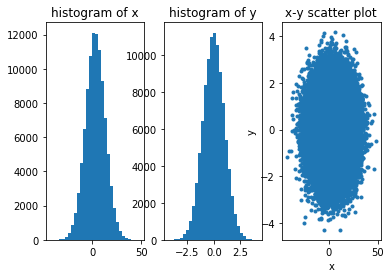

In [0]:
# random number generation
sample_num = 100000

var_x = 100
mean_x = 3
x = np.sqrt(var_x)*np.random.randn(sample_num,1) + mean_x
y = np.random.randn(sample_num,1)

plt.subplot(1,3,1)
plt.title("histogram of x")
plt.hist(x,30)
plt.subplot(1,3,2)
plt.title("histogram of y")
plt.hist(y,30)
plt.subplot(1,3,3)
plt.title("x-y scatter plot")
plt.plot(x, y,'.')
plt.xlabel("x")
plt.ylabel("y")


In [0]:
def f(x):
    return x**2

# conditional expectation of E[X|Y]
def conditional_expectation(x, y, lb = -1000):
    sum_y = 0
    count = 0
    
    for i in range(x.size):
        if x[i] >= lb:
            sum_y += y[i]
            count += 1
            
            
    if (count != 0):
        return sum_y/(count)
    else:
        return 0

In [0]:
# check conditional expectation
cond_mean_y_calc = conditional_expectation(y, x) # init lb is -1000 means no effect condition
mean_y_np = np.mean(y)

print("calc_mean : " + str(cond_mean_y_calc) + ", numpy mean : " + str(mean_y_np))


calc_mean : [3.01075022], numpy mean : -0.0017655311045528257


In [0]:
# calc covariance cov(Y - E[Y|X], f(X))
def test_cov(y, x, f, lb = -1000):
    
    cond_mean = conditional_expectation(y, x, lb)
    sum_val = 0
    count = 0
    for i in range(sample_num):
        left_val = y[i] - cond_mean
        right_val = f(x[i])

        sum_val += left_val * right_val
        count += 1
        
    return sum_val/count

In [0]:
iter_num = 1000

LB = np.linspace(mean_x - 3 * np.sqrt(var_x), mean_x + 3 * np.sqrt(var_x), iter_num)
VAL = np.zeros(iter_num)

for i in range(iter_num):
    VAL[i] = conditional_expectation(y, x, LB[i])
    


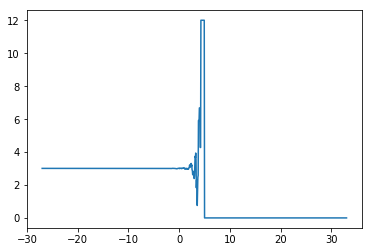

In [0]:
plt.plot(LB, VAL)